In [1]:
from pandasql import sqldf
import itertools
import scipy.stats as st
from datetime import timedelta
from dateutil import parser
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import decomposition
from mpl_toolkits import mplot3d
from numpy import arange
import numpy as np
import warnings
import pandas as pd

# Allow to display all dataframes columns
pd.set_option("display.max_columns", None)

# Inactivate warnings
warnings.filterwarnings('ignore')

# Data load

In [2]:
# customers_dataset
customers_dataset = pd.read_csv(
    'olist_customers_dataset.csv', sep=',', decimal='.', encoding='utf8', low_memory=False)
# geolocation_dataset
geolocation_dataset = pd.read_csv(
    'olist_geolocation_dataset.csv', sep=',', decimal='.', encoding='utf8', low_memory=False)
# order_items_dataset
order_items_dataset = pd.read_csv(
    'olist_order_items_dataset.csv', sep=',', decimal='.', encoding='utf8', low_memory=False)
# order_payments_dataset
order_payments_dataset = pd.read_csv(
    'olist_order_payments_dataset.csv', sep=',', decimal='.', encoding='utf8', low_memory=False)
# order_reviews_dataset
order_reviews_dataset = pd.read_csv(
    'olist_order_reviews_dataset.csv', sep=',', decimal='.', encoding='utf8', low_memory=False)
# orders_dataset
orders_dataset = pd.read_csv('olist_orders_dataset.csv',
                             sep=',', decimal='.', encoding='utf8', low_memory=False)
# products_dataset
products_dataset = pd.read_csv(
    'olist_products_dataset.csv', sep=',', decimal='.', encoding='utf8', low_memory=False)
# sellers_dataset
sellers_dataset = pd.read_csv(
    'olist_sellers_dataset.csv', sep=',', decimal='.', encoding='utf8', low_memory=False)
# product_category_name_translation
product_category_name_translation = pd.read_csv(
    'product_category_name_translation.csv', sep=',', decimal='.', encoding='utf8', low_memory=False)

# Looking for primary keys

In [3]:
list_dataset = {'customers_dataset': customers_dataset, 'geolocation_dataset': geolocation_dataset,
                'order_items_dataset': order_items_dataset,
                'order_payments_dataset': order_payments_dataset,
                'order_reviews_dataset': order_reviews_dataset, 'orders_dataset': orders_dataset,
                'products_dataset': products_dataset, 'sellers_dataset': sellers_dataset,
                'product_category_name_translation': product_category_name_translation}

for key in list_dataset:
    print(key)
    print('-------------------------')

    test = False
    for column in list_dataset[key].columns:
        if '_id' in column:
            print(column)
            test = True

    if not test:
        print(list_dataset[key].columns)

    print('')

customers_dataset
-------------------------
customer_id
customer_unique_id

geolocation_dataset
-------------------------
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

order_items_dataset
-------------------------
order_id
order_item_id
product_id
seller_id

order_payments_dataset
-------------------------
order_id

order_reviews_dataset
-------------------------
review_id
order_id

orders_dataset
-------------------------
order_id
customer_id

products_dataset
-------------------------
product_id

sellers_dataset
-------------------------
seller_id

product_category_name_translation
-------------------------
Index(['product_category_name', 'product_category_name_english'], dtype='object')



## Datasets merging

### orders_dataset

In [4]:
orders_dataset[orders_dataset.duplicated('order_id', keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [5]:
orders = orders_dataset.copy()
print(orders.shape)

(99441, 8)


### customers_dataset

In [6]:
orders = pd.merge(orders, customers_dataset, on=['customer_id'], how='left')
print(orders.shape)

(99441, 12)


### geolocation_dataset

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [8]:
test = orders[orders['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']
test

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP


In [9]:
test = pd.merge(test, geolocation_dataset, left_on=['customer_zip_code_prefix', 'customer_city',
                                                    'customer_state'], right_on=['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'],
                how='left')
test

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.580054,-46.586673,sao paulo,SP
5,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.578333,-46.587123,sao paulo,SP
6,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.574809,-46.587471,sao paulo,SP
7,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.576281,-46.587276,sao paulo,SP
8,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.573954,-46.587331,sao paulo,SP
9,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.579628,-46.586714,sao paulo,SP


### order_items_dataset

In [10]:
orders = pd.merge(orders, order_items_dataset, on=['order_id'], how='left')
print(orders.shape)

(113425, 18)


In [11]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### order_payments_dataset

In [12]:
orders = pd.merge(orders, order_payments_dataset, on=['order_id'], how='left')
print(orders.shape)

(118434, 22)


In [13]:
order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [14]:
order_payments_dataset.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [15]:
order_payments_dataset.payment_sequential.unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20], dtype=int64)

In [16]:
order_payments_dataset.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

### order_reviews_dataset

In [17]:
orders = pd.merge(orders, order_reviews_dataset, on=['order_id'], how='left')
print(orders.shape)

(119143, 28)


In [18]:
order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### products_dataset

In [19]:
orders = pd.merge(orders, products_dataset, on=['product_id'], how='left')
print(orders.shape)

(119143, 36)


### sellers_dataset

In [20]:
orders = pd.merge(orders, sellers_dataset, on=['seller_id'], how='left')
print(orders.shape)

(119143, 39)


### product_category_name_translation

In [21]:
orders = pd.merge(orders, product_category_name_translation,
                  on=['product_category_name'], how='left')
print(orders.shape)

(119143, 40)


# First cleaning

## Filtering orders

In [22]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [23]:
orders = orders[orders['order_status'] == 'delivered']
print(orders.shape)

(115723, 40)


## Missing values

In [24]:
(orders.isna().sum()/orders.shape[0]).sort_values(ascending=True)

order_id                         0.000000
freight_value                    0.000000
price                            0.000000
shipping_limit_date              0.000000
seller_id                        0.000000
product_id                       0.000000
order_item_id                    0.000000
customer_state                   0.000000
customer_city                    0.000000
customer_zip_code_prefix         0.000000
customer_unique_id               0.000000
order_estimated_delivery_date    0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
order_purchase_timestamp         0.000000
order_status                     0.000000
customer_id                      0.000000
seller_state                     0.000000
order_delivered_carrier_date     0.000017
payment_value                    0.000026
payment_type                     0.000026
payment_sequential               0.000026
payment_installments             0.000026
order_delivered_customer_date    0

### payment_value

In [25]:
orders = orders[orders['payment_value'].notna()]
print(orders.shape)

(115720, 40)


### order_delivered_customer_date

In [26]:
orders = orders[orders['order_delivered_customer_date'].notna()]
print(orders.shape)

(115712, 40)


### review_id

In [27]:
orders = orders[orders['review_id'].notna()]
print(orders.shape)

(114851, 40)


### Check

In [28]:
(orders.isna().sum()/orders.shape[0]).sort_values(ascending=True)

order_id                         0.000000
seller_city                      0.000000
seller_zip_code_prefix           0.000000
review_answer_timestamp          0.000000
review_creation_date             0.000000
review_score                     0.000000
review_id                        0.000000
payment_value                    0.000000
payment_installments             0.000000
seller_state                     0.000000
payment_sequential               0.000000
freight_value                    0.000000
price                            0.000000
shipping_limit_date              0.000000
payment_type                     0.000000
product_id                       0.000000
customer_id                      0.000000
order_status                     0.000000
seller_id                        0.000000
order_delivered_customer_date    0.000000
order_estimated_delivery_date    0.000000
order_purchase_timestamp         0.000000
customer_zip_code_prefix         0.000000
order_item_id                    0

# Feature engineering

In [29]:
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders.order_purchase_timestamp)
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp'].dt.strftime(
    '%Y-%m-%d')

orders['order_delivered_customer_date'] = pd.to_datetime(
    orders.order_delivered_customer_date)
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].dt.strftime(
    '%Y-%m-%d')

orders['order_estimated_delivery_date'] = pd.to_datetime(
    orders.order_estimated_delivery_date)
orders['order_estimated_delivery_date'] = orders['order_estimated_delivery_date'].dt.strftime(
    '%Y-%m-%d')

orders['review_creation_date'] = pd.to_datetime(orders.review_creation_date)
orders['review_creation_date'] = orders['review_creation_date'].dt.strftime(
    '%Y-%m-%d')

orders['review_answer_timestamp'] = pd.to_datetime(
    orders.review_answer_timestamp)
orders['review_answer_timestamp'] = orders['review_answer_timestamp'].dt.strftime(
    '%Y-%m-%d')

## Delay since last order

In [30]:
min_command_date = parser.parse(orders['order_purchase_timestamp'].min())
min_command_date

datetime.datetime(2016, 10, 3, 0, 0)

In [31]:
max_command_date = parser.parse(orders['order_purchase_timestamp'].max())
max_command_date

datetime.datetime(2018, 8, 29, 0, 0)

In [32]:
def last_order_since(df):
    last_command_date = parser.parse(df['order_purchase_timestamp'])
    return (max_command_date-last_command_date).days


orders['last_order_since'] = orders.apply(last_order_since, axis=1)

## Delivery delay

In [33]:
def delivery_delay(df):
    dd = parser.parse(df['order_delivered_customer_date'])
    edd = parser.parse(df['order_estimated_delivery_date'])
    return (dd-edd).days


orders['delivery_delay'] = orders.apply(delivery_delay, axis=1)

## Lenght of comment's message

In [34]:
orders.review_comment_message = orders.review_comment_message.fillna('')

In [35]:
def count_review_char(df):
    return len(df['review_comment_message'])


orders['review_length'] = orders.apply(count_review_char, axis=1)

## Delay to answer the comment

In [36]:
def review_answer_delay(df):
    rcd = parser.parse(df['review_creation_date'])
    rad = parser.parse(df['review_answer_timestamp'])
    return (rad-rcd).days


orders['review_answer_delay'] = orders.apply(review_answer_delay, axis=1)

## Product description

In [37]:
orders.product_name_lenght = orders.product_name_lenght.fillna(0)
orders.product_description_lenght = orders.product_description_lenght.fillna(0)
orders.product_photos_qty = orders.product_photos_qty.fillna(0)

In [38]:
def desc_detail(df):
    return (df['product_name_lenght'] + df['product_description_lenght'])


orders['desc_detail'] = orders.apply(desc_detail, axis=1)

## Save the orders dataframe

In [39]:
orders.to_csv('olist_orders_reviewed.csv',
              sep=',', decimal='.',
              encoding='utf8', index=False)

## GroupBy client

In [40]:
# pandasql helper function
def pysqldf(q): return sqldf(q, globals())

In [41]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english', 'last_order_since', 'delivery_delay',
       'review_

In [42]:
query = """
SELECT 
    DISTINCT(customer_unique_id) AS customer_id,
    AVG(last_order_since) AS recency,
    COUNT(DISTINCT(order_id)) AS total_orders,
    COUNT(DISTINCT(product_id)) AS total_products,
    SUM(payment_value) AS total_value,
    COUNT(DISTINCT(payment_type)) AS total_payment_types,
    COUNT(payment_installments) AS total_payment_installments,
    AVG(delivery_delay) AS mean_delivery_delay,    
    AVG(review_score) AS mean_review_score,    
    AVG(review_length) AS mean_review_message_length,
    AVG(review_answer_delay) AS mean_review_answer_delay,
    AVG(desc_detail) AS mean_product_desc_length,
    AVG(product_photos_qty) AS mean_product_photos_qty
FROM orders
WHERE customer_unique_id IS NOT NULL 
GROUP BY customer_unique_id
ORDER BY customer_unique_id
"""

In [43]:
clients = pysqldf(query)
clients.head()

,customer_id,recency,total_orders,total_products,total_value,total_payment_types,total_payment_installments,mean_delivery_delay,mean_review_score,mean_review_message_length,mean_review_answer_delay,mean_product_desc_length,mean_product_photos_qty
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,1,1,141.90,1,1,-5.0,5.0,111.0,4.0,296.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,1,1,27.19,1,1,-5.0,4.0,0.0,0.0,691.0,1.0
2,0000f46a3911fa3c0805444483337064,537.0,1,1,86.22,1,1,-2.0,3.0,0.0,1.0,226.0,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,321.0,1,1,43.62,1,1,-12.0,4.0,12.0,1.0,1784.0,5.0
4,0004aac84e0df4da2b147fca70cf8255,288.0,1,1,196.89,1,1,-8.0,5.0,0.0,4.0,852.0,3.0


# Final cleaning

## Remove useless columns

In [44]:
clients = clients.drop('customer_id', axis=1)
print(clients.shape)

(92746, 12)


## Missing values

In [45]:
(clients.isna().sum()/clients.shape[0]).sort_values(ascending=True)

recency                       0.0
total_orders                  0.0
total_products                0.0
total_value                   0.0
total_payment_types           0.0
total_payment_installments    0.0
mean_delivery_delay           0.0
mean_review_score             0.0
mean_review_message_length    0.0
mean_review_answer_delay      0.0
mean_product_desc_length      0.0
mean_product_photos_qty       0.0
dtype: float64

# Data exploration

## Univariate

### Generalities

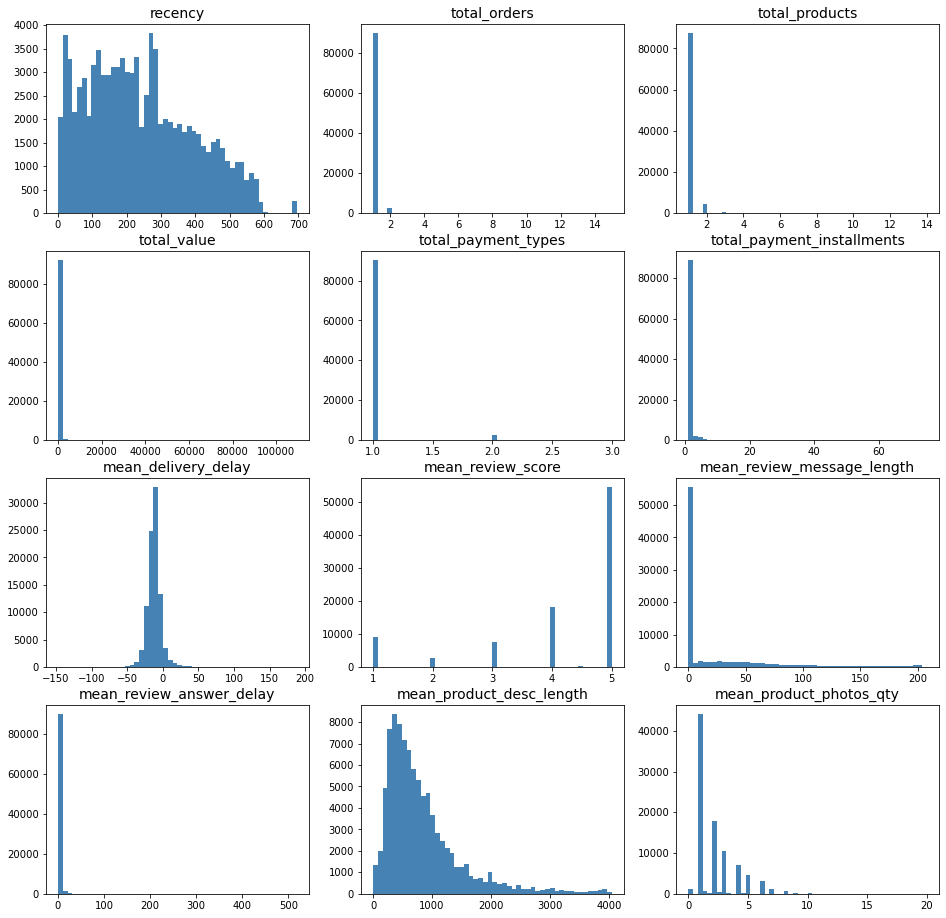

In [46]:
columns = clients.columns
X = clients[columns].values

labels = columns

fig = plt.figure(figsize=(16, 16))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(4, 3, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue',
                density=False, edgecolor='none')
    ax.set_title(labels[feat_idx], fontsize=14)

In [47]:
clients.describe()

,recency,total_orders,total_products,total_value,total_payment_types,total_payment_installments,mean_delivery_delay,mean_review_score,mean_review_message_length,mean_review_answer_delay,mean_product_desc_length,mean_product_photos_qty
count,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000
mean,238.650210,1.033177,1.068391,212.072731,1.026211,1.238339,-11.887273,4.153367,27.437034,2.585438,832.203142,2.224992
std,152.351513,0.208425,0.315591,629.995400,0.160706,0.845920,10.069528,1.280530,47.243976,9.790523,653.534235,1.744075
min,0.000000,1.000000,1.000000,9.590000,1.000000,1.000000,-147.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,115.000000,1.000000,1.000000,63.782500,1.000000,1.000000,-17.000000,4.000000,0.000000,1.000000,399.000000,1.000000
50%,220.000000,1.000000,1.000000,113.010000,1.000000,1.000000,-12.000000,5.000000,0.000000,1.000000,651.000000,2.000000
75%,347.000000,1.000000,1.000000,201.987500,1.000000,1.000000,-7.000000,5.000000,40.000000,3.000000,1042.000000,3.000000
max,695.000000,15.000000,14.000000,109312.640000,3.000000,75.000000,188.000000,5.000000,208.000000,518.000000,4047.000000,20.000000


### Recency

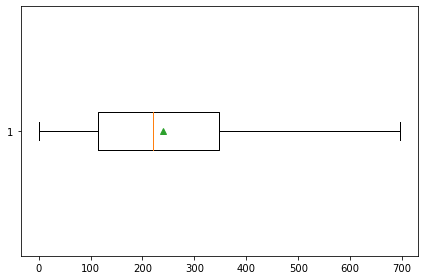

In [48]:
plt.boxplot(clients['recency'], vert=False, showmeans=True, showfliers=True)
plt.tight_layout()
plt.gcf().savefig('boxplot_recency', dpi=100)
plt.show()

### Frequency

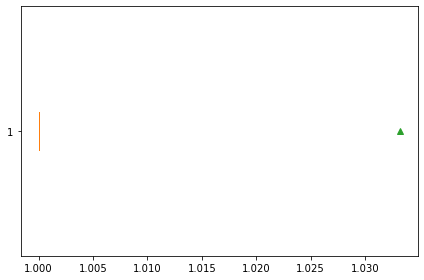

In [49]:
plt.boxplot(clients['total_orders'], vert=False,
            showmeans=True, showfliers=False)
plt.tight_layout()
plt.gcf().savefig('boxplot_total_orders', dpi=100)
plt.show()

In [50]:
len(clients[clients['total_orders'] == 1])/len(clients)*100

97.01981756625622

In [51]:
len(clients[clients['total_products'] == 1])/len(clients)*100

94.31997067258965

### Amount

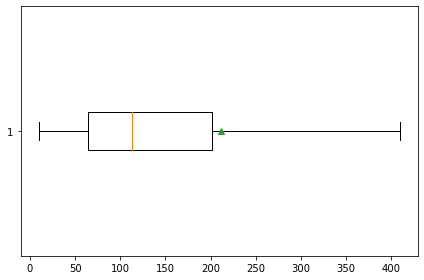

In [52]:
plt.boxplot(clients['total_value'], vert=False,
            showmeans=True, showfliers=False)
plt.tight_layout()
plt.gcf().savefig('boxplot_total_value', dpi=100)
plt.show()

### Client's satisfaction

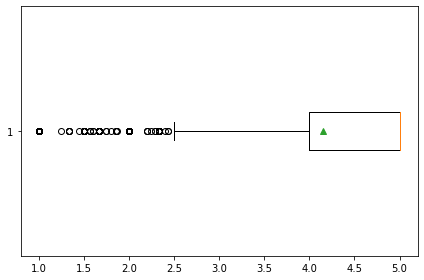

In [53]:
plt.boxplot(clients['mean_review_score'], vert=False,
            showmeans=True, showfliers=True)
plt.tight_layout()
plt.gcf().savefig('boxplot_mean_review_score', dpi=100)
plt.show()

## Bivariate

### Global

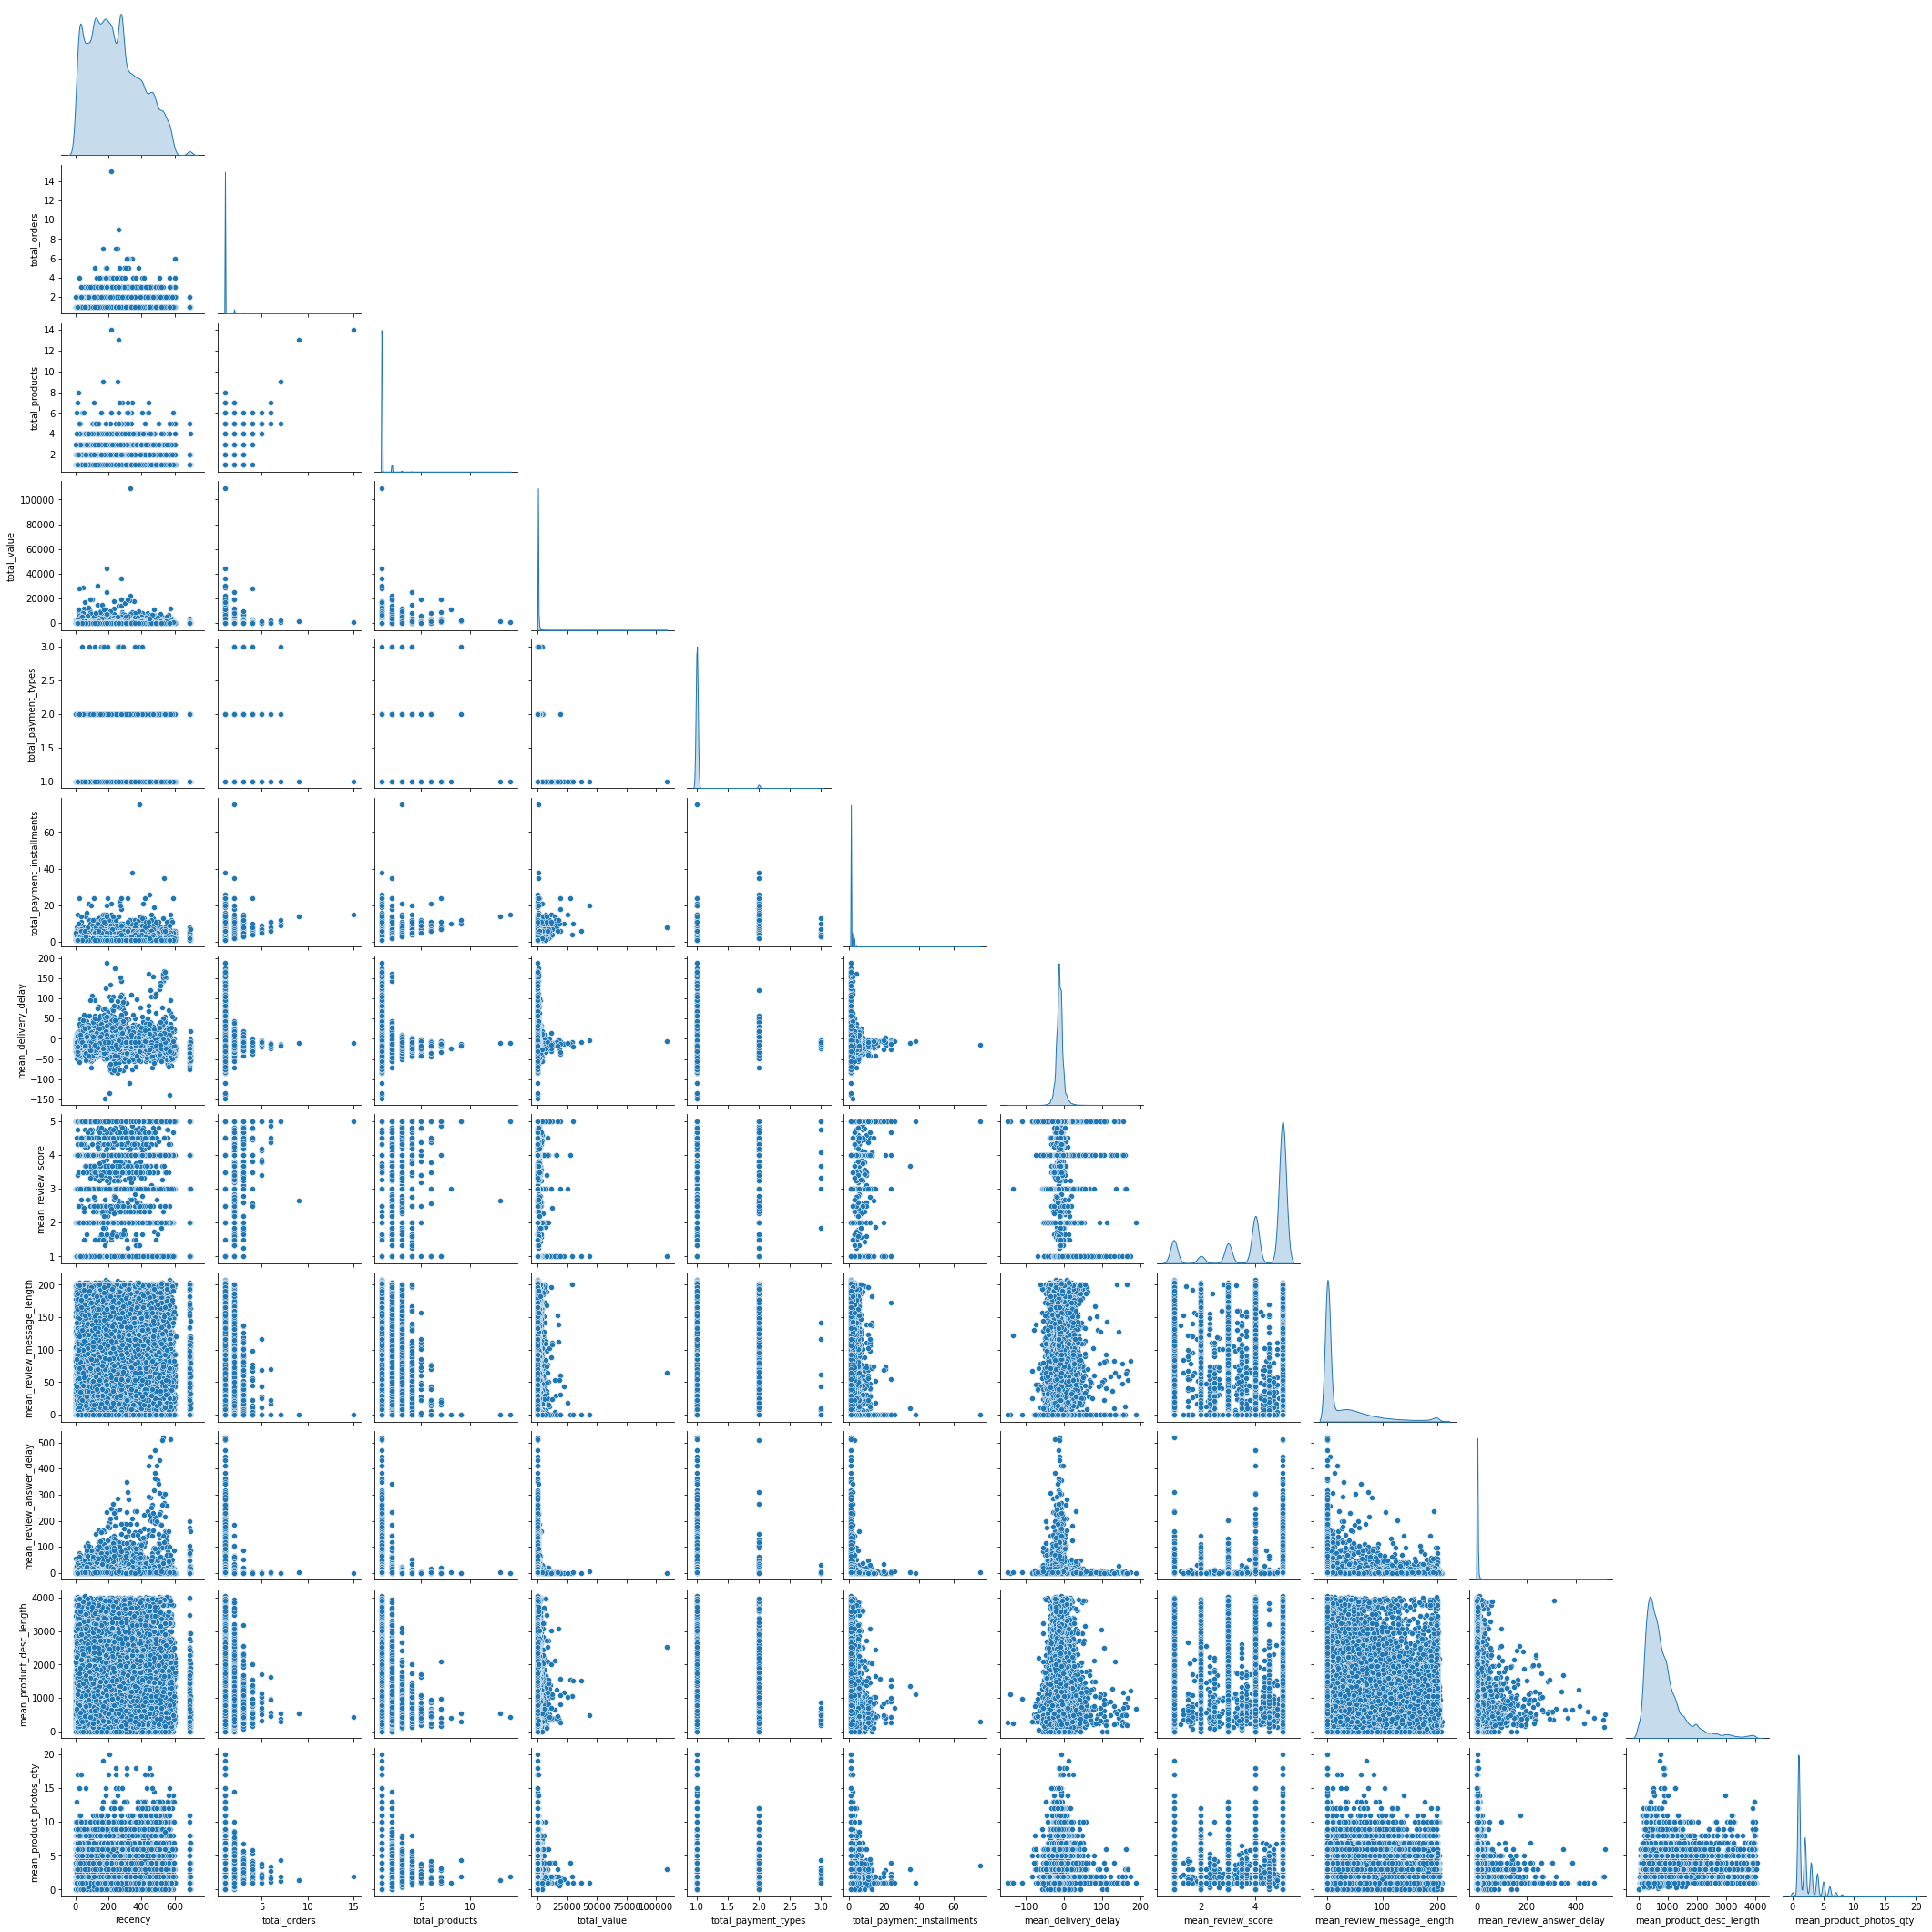

In [54]:
sns.pairplot(clients, diag_kind="kde", corner=True)

### Based on total_value

In [55]:
clients_binarized = clients.copy()

In [56]:
clients_binarized.loc[clients_binarized["total_value"]
                      <= 63.79, "total_value"] = 1

clients_binarized.loc[(clients_binarized["total_value"] > 63.79) & (
    clients_binarized["total_value"] <= 113.03), "total_value"] = 2

clients_binarized.loc[(clients_binarized["total_value"] > 113.03) & (
    clients_binarized["total_value"] <= 201.99), "total_value"] = 3

clients_binarized.loc[clients_binarized["total_value"]
                      > 201.99, "total_value"] = 4

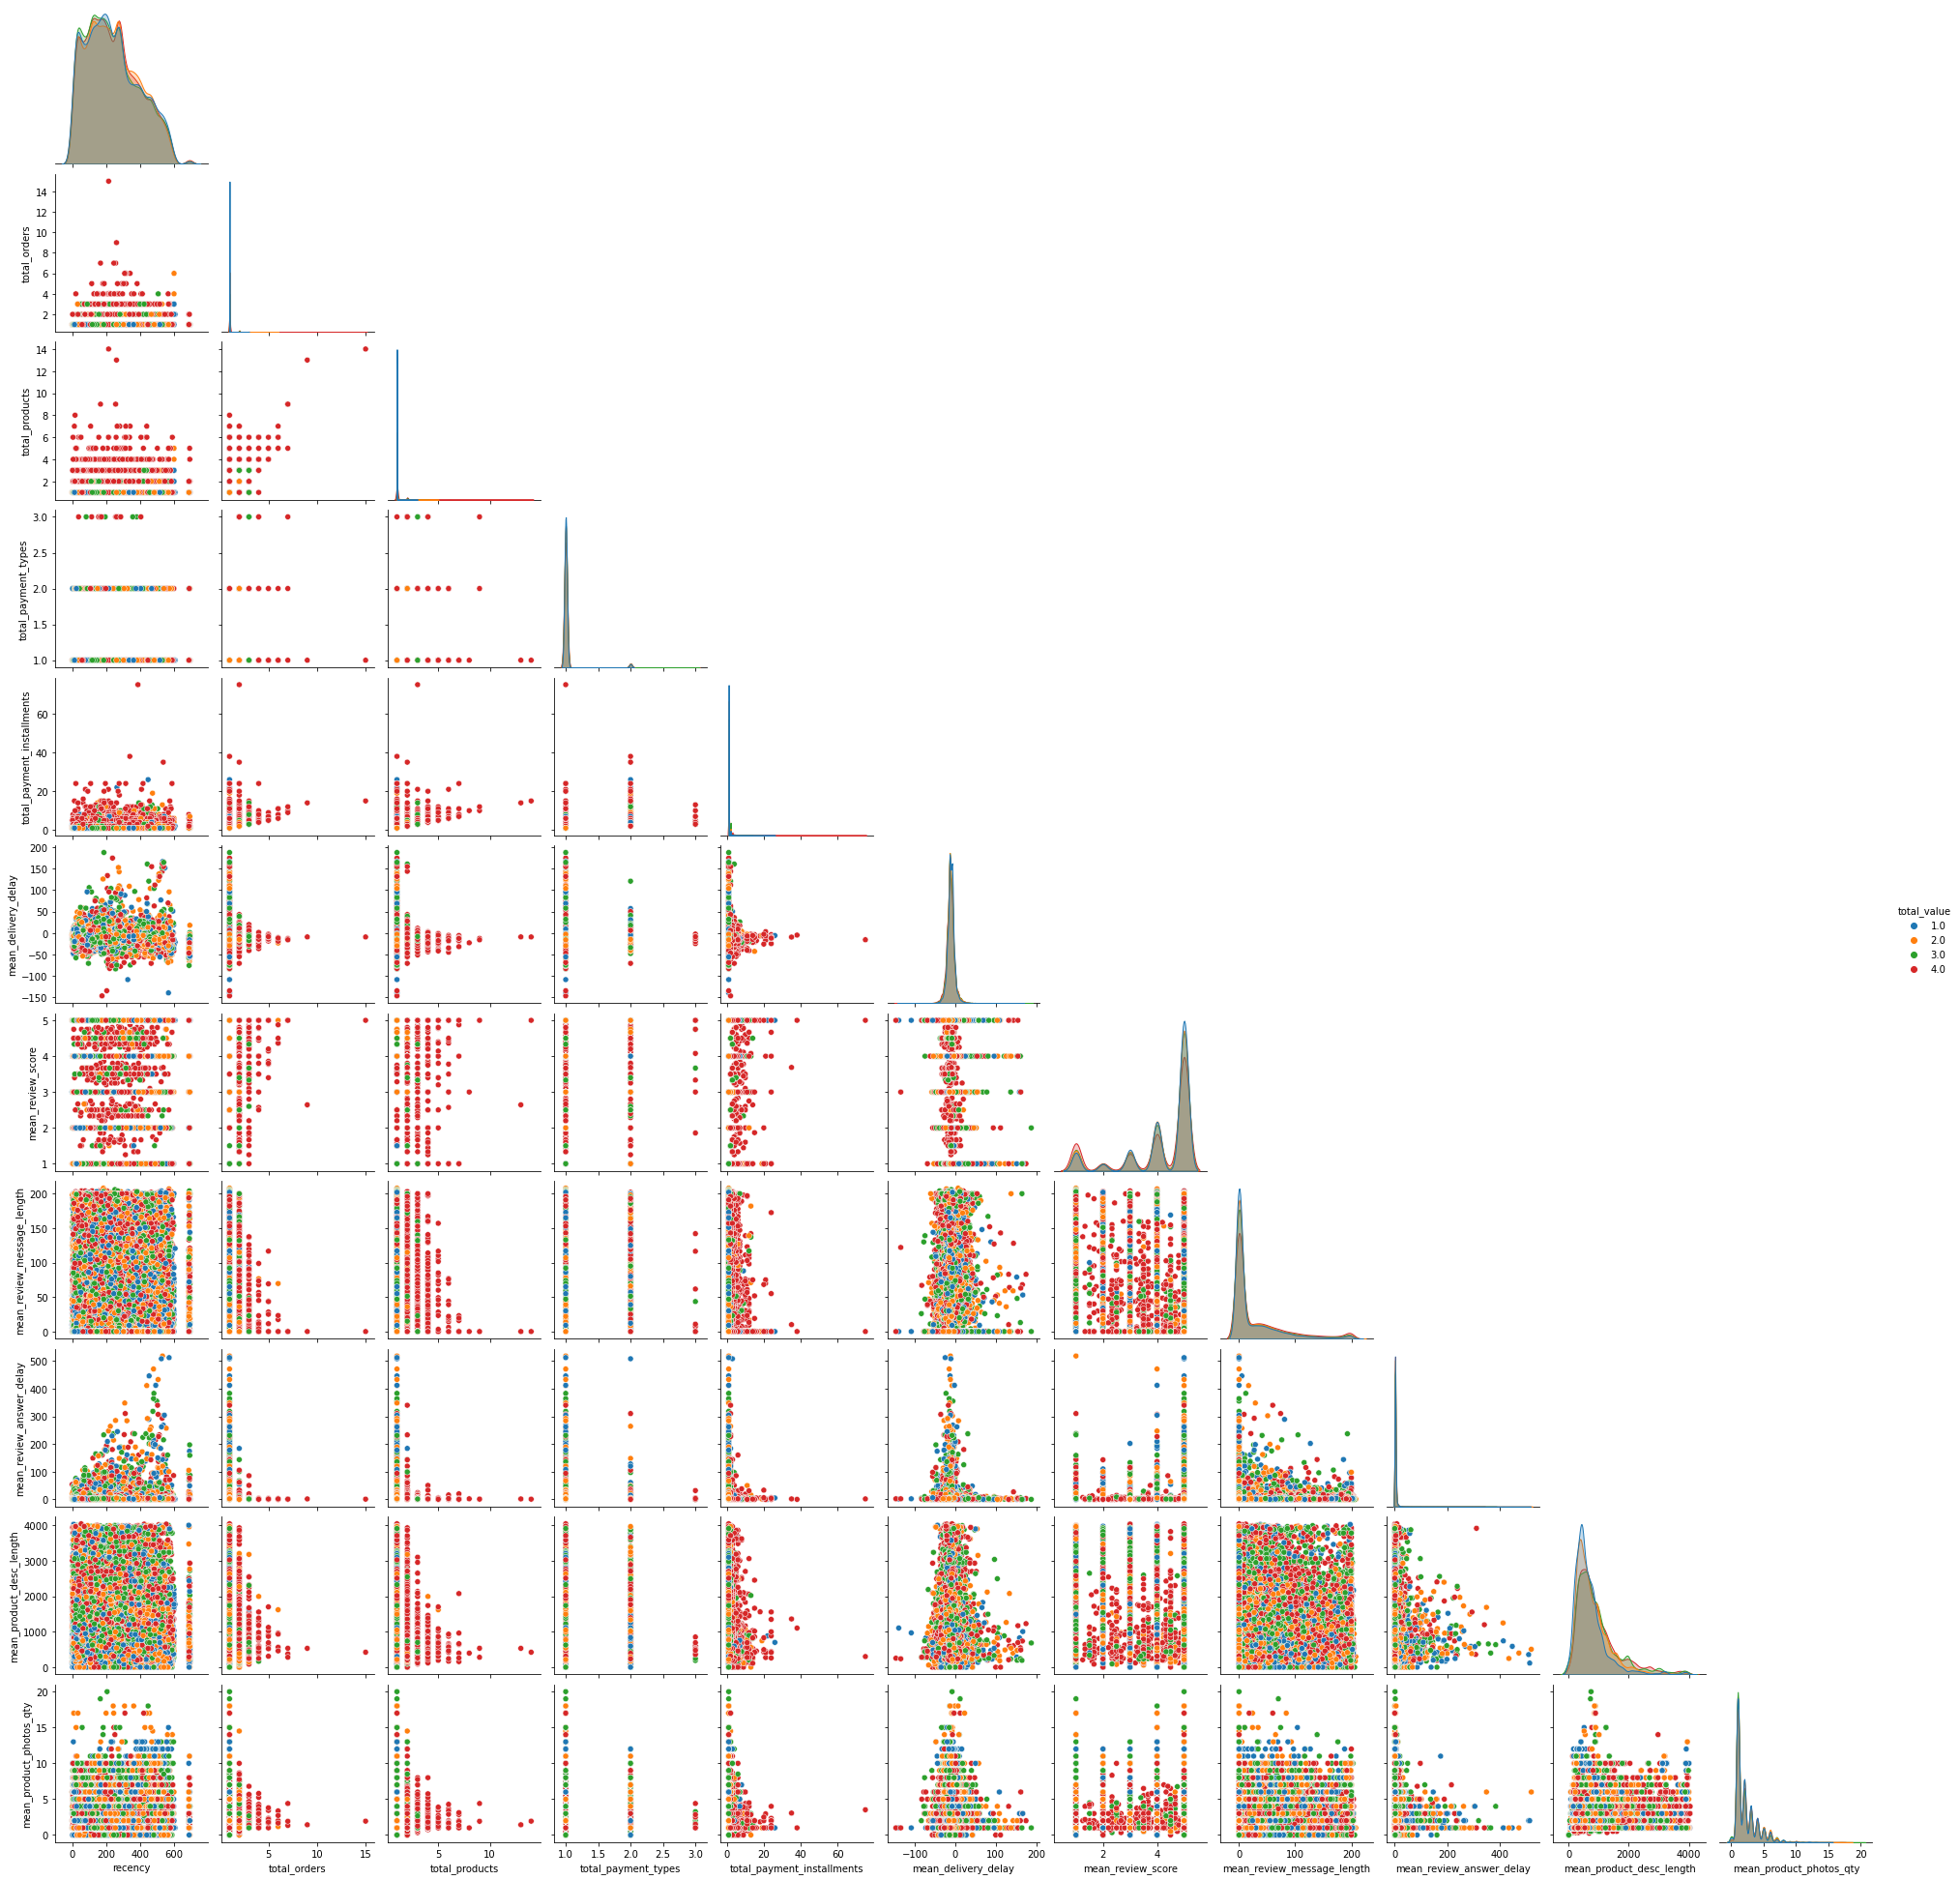

In [57]:
sns.pairplot(clients_binarized, hue='total_value',
             diag_kind="kde", palette='tab10', corner=True)

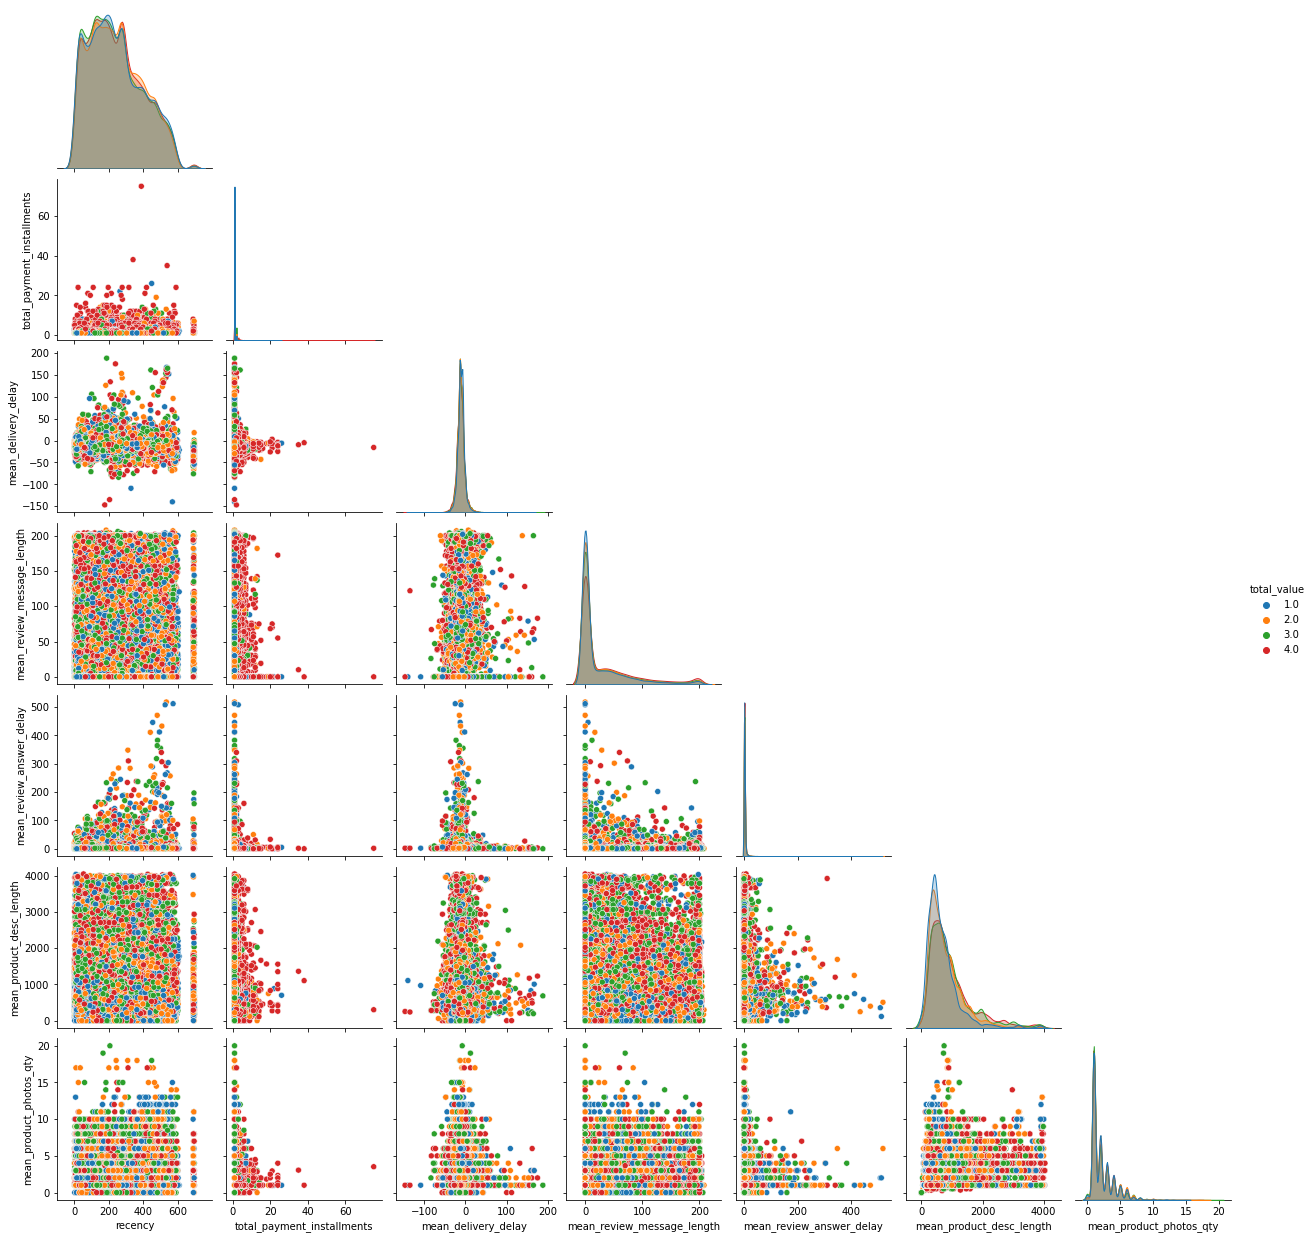

In [58]:
sns.pairplot(clients_binarized, hue='total_value', vars=[
    'recency', 'total_payment_installments', 'mean_delivery_delay', 'mean_review_message_length',
    'mean_review_answer_delay', 'mean_product_desc_length', 'mean_product_photos_qty'],
    diag_kind="kde", palette='tab10', corner=True)
plt.savefig('sns.pairplot.png')

### Correlation

In [59]:
clients.corr()

,recency,total_orders,total_products,total_value,total_payment_types,total_payment_installments,mean_delivery_delay,mean_review_score,mean_review_message_length,mean_review_answer_delay,mean_product_desc_length,mean_product_photos_qty
recency,1.000000,0.027909,0.018964,-0.000621,0.021498,0.023264,-0.098895,-0.006433,0.013114,0.043973,-0.043622,-0.006175
total_orders,0.027909,1.000000,0.645943,0.084018,0.137565,0.378343,-0.014874,0.008507,-0.006498,-0.003970,-0.015063,-0.016132
total_products,0.018964,0.645943,1.000000,0.176639,0.084770,0.485637,-0.044424,-0.072503,0.048632,-0.003169,-0.045178,-0.027878
total_value,-0.000621,0.084018,0.176639,1.000000,0.003032,0.379518,-0.016507,-0.063343,0.046870,-0.000542,0.074735,-0.003695
total_payment_types,0.021498,0.137565,0.084770,0.003032,1.000000,0.303580,-0.007489,0.000075,0.001741,0.004405,-0.006717,0.001271
total_payment_installments,0.023264,0.378343,0.485637,0.379518,0.303580,1.000000,-0.028522,-0.083257,0.052430,-0.000242,-0.023441,-0.041427
mean_delivery_delay,-0.098895,-0.014874,-0.044424,-0.016507,-0.007489,-0.028522,1.000000,-0.268663,0.066177,-0.014428,0.001910,0.002440
mean_review_score,-0.006433,0.008507,-0.072503,-0.063343,0.000075,-0.083257,-0.268663,1.000000,-0.378688,0.006747,0.014419,0.014047
mean_review_message_length,0.013114,-0.006498,0.048632,0.046870,0.001741,0.052430,0.066177,-0.378688,1.000000,-0.003975,-0.000296,-0.004809
mean_review_answer_delay,0.043973,-0.003970,-0.003169,-0.000542,0.004405,-0.000242,-0.014428,0.006747,-0.003975,1.000000,0.003099,-0.005199


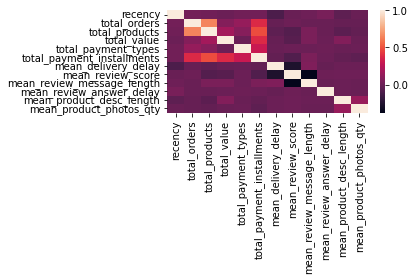

In [60]:
sns.heatmap(clients.corr())
plt.tight_layout()
plt.savefig('sns.heatmap.png')

In [61]:
stat, p = st.pearsonr(clients['total_orders'], clients['total_products'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')

stat=0.646, p=0.000
Probablement dépendant


In [62]:
stat, p = st.pearsonr(
    clients['total_payment_installments'], clients['total_orders'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')

stat=0.378, p=0.000
Probablement dépendant


In [63]:
stat, p = st.pearsonr(
    clients['total_payment_installments'], clients['total_products'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')

stat=0.486, p=0.000
Probablement dépendant


In [64]:
stat, p = st.pearsonr(
    clients['total_payment_installments'], clients['total_value'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablement indépendant')
else:
    print('Probablement dépendant')

stat=0.380, p=0.000
Probablement dépendant


# Principal components analysis

In [65]:
std_scale = preprocessing.StandardScaler().fit(clients)
clients_scaled = std_scale.transform(clients)

In [66]:
pca = decomposition.PCA(n_components=12)
pca.fit(clients_scaled)

PCA(n_components=12)

In [67]:
print(pca.explained_variance_ratio_)

[0.18508233 0.12518905 0.09771679 0.08976328 0.08434384 0.08351774
 0.08167814 0.07226693 0.06969116 0.04697996 0.03703535 0.02673543]


In [68]:
print('Explained variance by the 3 first components:',
      pca.explained_variance_ratio_[0:3].sum())

Explained variance by the 3 first components: 0.4079881728963829


In [69]:
# clients projected on the different principal components
clients_projected = pca.transform(clients_scaled)

Text(0, 0.5, 'PC3')

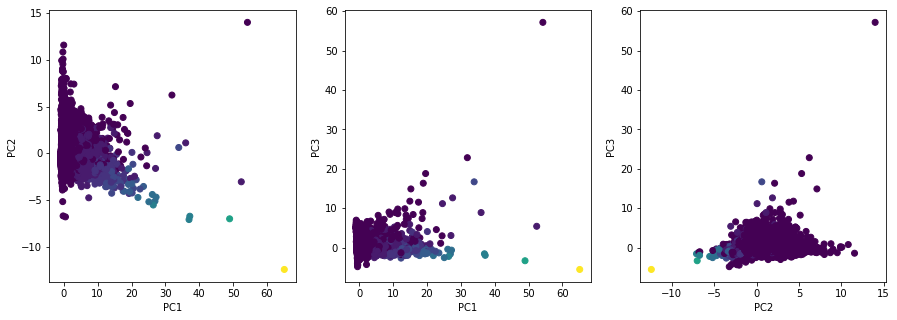

In [70]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 3, 1)
s = ax.scatter(clients_projected[:, 0],
               clients_projected[:, 1], c=clients.get('total_orders'))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax = fig.add_subplot(1, 3, 2)
s = ax.scatter(clients_projected[:, 0],
               clients_projected[:, 2], c=clients.get('total_orders'))
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')

ax = fig.add_subplot(1, 3, 3)
s = ax.scatter(clients_projected[:, 1],
               clients_projected[:, 2], c=clients.get('total_orders'))
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')

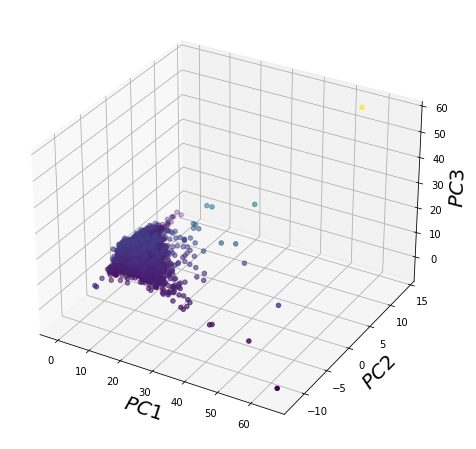

In [71]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
xdata = clients_projected[:, 0]
ydata = clients_projected[:, 1]
zdata = clients_projected[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=zdata)
ax.set_xlabel('$PC1$', fontsize=20, rotation=150)
ax.set_ylabel('$PC2$', fontsize=20, rotation=150)
ax.set_zlabel('$PC3$', fontsize=20, rotation=150)

plt.gcf().savefig('pca_3d', dpi=100)
plt.show()

# Save the dataframe

In [72]:
clients.to_csv('olist_clients.csv',
               sep=',', decimal='.',
               encoding='utf8', index=False)